# Examen número 1: Métodos computacionales para físicos.

**NOTA:** El examen consta de 2 partes y se califica sobre 100 puntos. No puede usar ningún material adicional al examen (libros, notas, páginas de internet, etc), ni tampoco consultar a ninguna persona durante la realizacón del mismo. Recuerde que el fraude académico está sancionado en el Reglamento Estudiantil. El examen tiene una duración de 2 horas. Debe estar claramente escrito, desarrollado y justificado. Respuesta sin sustentación pierde sus puntos.


**Profesor:** Hernán David Salinas Jiménez.

Instituto de Física

Universidad de Antioquia




1. (70Pts). Un objeto que cae verticalmente en el aire sujeto a la resistencia del aire  y también a la fuerza de gravedad. Suponga que el objeto tiene una masa m y cae desde una  altura $s_0$ y que la altura del objeto después de $t$ segundos es:

\begin{equation}
s(t)=s_0-\frac{mg}{k} t + \frac{m^2g}{k^2}(1-e^{-kt/m})
\end{equation}

donde $g=9.8 \mathrm{m/s}$, $k=0.148\mathrm{kg\ s\ /m}$  es el coeficiente de resistencia con el aire. Suponga que $s_0 = 900m$ y  $m = 0.25\mathrm{kg}$. Para la situación planteada:  


a (10 Pts). Realizar un gráfico de $s$ como función del tiempo, para ello cree una función para  $s(t)$  llamada caida:

  ```python
  def caida():

    return
  ```


b (30 Pts). Determine el tiempo de caida del objeto, empleando el metodo de:

  - Secante

  - Newton-Rapshon.

  - Punto Fijo




c (30 Pts). Determine la el tiempo de caida para 10 valores de la masa entre $0.25$Kg y $1$Kg.

Ayuda: Para comprobar que el cálculo de la derivada es el adecuado, se puede ayudar de la libreria de sympy. En el siguiente ejemplo se muestra el uso de la derivada para los primeros términos del problema:

```python
import sympy as sp
x=sp.symbols('x')
m=sp.symbols('m')
g=sp.symbols('g')
k=sp.symbols('k')
s0=sp.symbols('s0')
t=sp.symbols('t')

f = lambda t: s0-m*g*t/k
# Primera derivada
sp.diff(f(t), t, 1)

Métodos

scipy.optimize.newton
scipy.optimize.fixed_point
```


2.(30 Pts) Para el siguiente dataSet que contiene información del clima de un lugar determinado realizar lo siguiente:  ([Clima Data set](https://raw.githubusercontent.com/hernansalinas/autogrades/main/Evaluaciones/dataset/Temperature_Bogota_Barcelona.csv)).

a. Leer el data set.

b. Listar todas las columnas como una lista.

c. Determinar los elemenntos únicos de la columna Wheater

d. Crear un filtro para la columna  Wheater cuando toma el valor de  "Cloudy"

e. Para el filtro anterior,  realizar un gráfico de la columna "Temp_C" , "Press_kPa" como función del tiempo.


Ayudas.

Para generar la columna del  tiempo en numeral e necesario para la graficación,  emplee la siguiente linea:
```python
df["Time"]=pd.to_datetime (df["Date/Time"], format='%m/%d/%Y %H:%M')
```

df.Time será la columna a lo largo de la cordenada independiente.



Algunos comandos de pandas:


|Comando|	Descripción|
|-------|------------|
|pd.read_csv()|	Lee un archivo CSV y lo convierte en un DataFrame de Pandas
|pd.read_excel()|	Lee un archivo de Excel y lo convierte en un DataFrame de |Pandas|
|pd.read_json()|	Lee un archivo JSON y lo convierte en un DataFrame de Pandas|
|df.head()|	Muestra las primeras filas del DataFrame|
|df.tail()|	Muestra las últimas filas del DataFrame|
|df.info()|	Muestra información sobre el DataFrame|
|df.describe()|	Muestra estadísticas descriptivas del DataFrame|
|df.dropna()|	Elimina filas con valores faltantes|
|df.drop_duplicates()|	Elimina filas duplicadas|
|df.groupby()	|Agrupa el DataFrame por una o más columnas|
|df.sort_values()|	Ordena el DataFrame por una o más columnas|
|df.to_csv()|	Guarda el DataFrame como un archivo CSV|
|df.loc[condicion]|	Crea una máscara booleana para seleccionar filas que cumplan con ciertas condiciones|
|df[df["columna"]== x]|	Crea una máscara booleana y a la aplica al dataframe en caso de el valor de la columna coincida con la variable|

# 1: Caida libre con fricción


In [119]:
# Importación de librerias

import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import sympy as sp
import pandas as pd

# Definimos la función caida()

In [120]:
def caida(t, s0, m, k, g ): # Parametros de entrada tiempo, altura inicial, masa, constante k y gravedad

  s = s0 - ((m*g)/k)*t + (((m**2)*g)/(k**2))*(1-np.exp((-k*t)/m))

  return s

# Parametros del problema

In [121]:
s0 = 900
m = .25
k = .148
g = 9.8

Para hacer una grafica correcta, primero determinaremos el tiempo total de caida con los parametros dados, usando scipy y sympy para obtener los valores y expresiones requeridas

In [122]:
# B.1): Hallar el tiempo de caida usando el método de la secante

s = lambda t: s0 - ((m*g)/k)*t + (((m**2)*g)/(k**2))*(1-np.exp((-k*t)/m))

tt_1 = sc.optimize.newton(s,5) # Tiempo de caida usando método de la secante
tt_1

56.05653612796469

In [123]:
# B.2): Hallar el tiempo de caida usando el método Newton-Rapshon

# Usamos la libreria Sympy para obtener la expresión de derivada de la función

x=sp.symbols('x')
m=sp.symbols('m')
g=sp.symbols('g')
k=sp.symbols('k')
s0=sp.symbols('s0')
t=sp.symbols('t')

s = s0 - ((m*g)/k)*t + (((m**2)*g)/(k**2))*(1-sp.exp((-k*t)/m))

sprime = sp.diff(s,t)
sprime

-g*m/k + g*m*exp(-k*t/m)/k

In [124]:
# Redefinimos los parametros

s0 = 900
m = .25
k = .148
g = 9.8

In [125]:
# ahora definimos s y sprime

s = lambda t: s0 - ((m*g)/k)*t + (((m**2)*g)/(k**2))*(1-np.exp((-k*t)/m))
sprime = lambda t: -((g*m)/k) + ((g*m*np.exp(-(k*t)/m))/k)

tt_2 = sc.optimize.newton(s,5,sprime)
tt_2

56.05653612796469

In [126]:
# B.3): Hallar el tiempo de caida usando el método del punto fijo

s = lambda t: s0 - ((m*g)/k)*t + (((m**2)*g)/(k**2))*(1-np.exp((-k*t)/m))

tt_3 = sc.optimize.newton(s,5) # Tiempo de caida usando método del punto fijo
tt_3

56.05653612796469

Todos los métodos nos dieron el mismo valor (56.05653612796469), esto es una muy buena señal, con nuestro tiempo de caida calculado podemos ahora si hacer la grafica

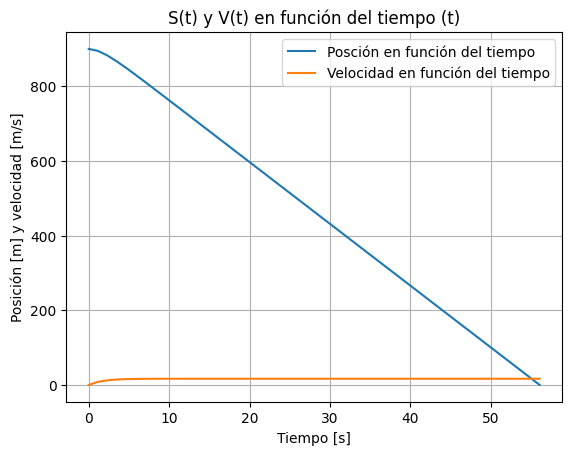

In [127]:
# A): Grafica de s(t) en función de t

# Como tenemos la derivada del la función s(t), tenemos la velocidad del cuerpo en función del tiempo, la usaremos para tener un mejor analisis

t = np.linspace(0,tt_1) # Intervalo de tiempo entre 0 y tiempo total de caida
s = caida(t, s0, m, k, g )
v = -((g*m)/k) + ((g*m*np.exp(-(k*t)/m))/k)

plt.title("S(t) y V(t) en función del tiempo (t)")
plt.plot(t,s, label = "Posción en función del tiempo")
plt.plot(t,-v, label = "Velocidad en función del tiempo") # Corrección de signo para v (sistema de referencia)
plt.legend()
plt.xlabel("Tiempo [s]")
plt.ylabel("Posición [m] y velocidad [m/s]")
plt.grid()
plt.show()

Analizando la grafica, vemos como el cuerpo poco a poco aumenta su velocidad hasta alcanzar un equilibrio (velocidad terminal), este comportamiento explica la curvatura al inicio en la función posicions S(t), y su posterio comportamiento lineal.

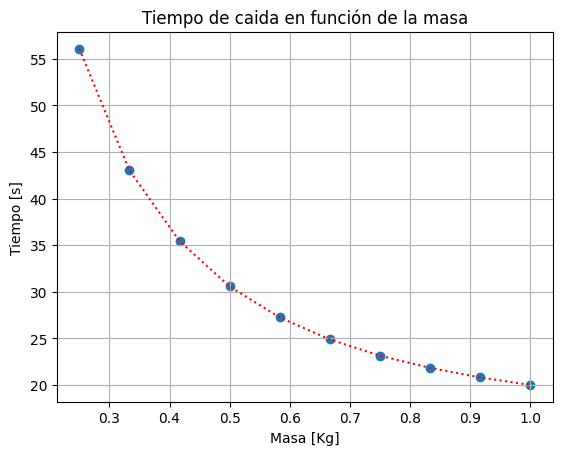

In [132]:
# C): Tiempo de caida para cuerpos entre 0.25 y 1 kilogramos

# Definimos el array de masas y el de ceros para los tiempos

m = np.linspace(0.25,1,10)
tiempos = np.zeros(10)

for i in range(0,10):

  # Definimos asi s(t) para que se redefina en cada iteración con el valor "m" deseado

  s = lambda t: s0 - ((m[i]*g)/k)*t + (((m[i]**2)*g)/(k**2))*(1-np.exp((-k*t)/m[i]))

  # Redefinimos cada indice de tiempos con el cero de la respectiva función s(t)
  tiempos[i] = sc.optimize.newton(s,5)

tiempos

# Grafica Bonus :D

plt.title("Tiempo de caida en función de la masa")
plt.plot(m,tiempos,linestyle=":",color="red")
plt.scatter(m,tiempos)
plt.xlabel("Masa [Kg]")
plt.ylabel("Tiempo [s]")
plt.grid()
plt.show()

# 2: DataFrame de clima

In [129]:
csv_data = "https://raw.githubusercontent.com/hernansalinas/autogradesMetodosComputacionales/main/Dataset/Weather%20Data.csv"

In [130]:
# A): Leer el csv como un DataFrame

df_wheather = pd.read_csv(csv_data)
df_wheather

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [146]:
# B): Listar las coumnas como una lista

lista_columnas = [df_wheather.head(0)]
lista_columnas

[Empty DataFrame
 Columns: [Date/Time, Temp_C, Dew Point Temp_C, Rel Hum_%, Wind Speed_km/h, Visibility_km, Press_kPa, Weather]
 Index: []]

In [171]:
# C): Determinar los elemenntos únicos de la columna Wheater

df_wheather_unicos = df_wheather['Weather']
df_wheather_unicos = df_wheather_unicos.drop_duplicates()
df_wheather_unicos

0                                           Fog
2                          Freezing Drizzle,Fog
16                                Mostly Cloudy
17                                       Cloudy
18                                         Rain
22                                 Rain Showers
36                                 Mainly Clear
41                                 Snow Showers
55                                         Snow
67                                        Clear
153                           Freezing Rain,Fog
154                               Freezing Rain
155                            Freezing Drizzle
221                                   Rain,Snow
279                               Moderate Snow
291                       Freezing Drizzle,Snow
297                   Freezing Rain,Snow Grains
309                           Snow,Blowing Snow
510                                Freezing Fog
516                                        Haze
546                                    R

In [169]:
# D): Crear un filtro para la columna Wheater cuando toma el valor de "Cloudy"

df_wheather_clouds = df_wheather
df_wheather_clouds = df_wheather.loc[df_wheather["Weather"]=="Cloudy"]
df_wheather_clouds

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
17,1/1/2012 17:00,3.0,0.0,81,13,16.1,99.81,Cloudy
20,1/1/2012 20:00,3.2,1.3,87,19,25.0,99.50,Cloudy
21,1/1/2012 21:00,4.0,1.7,85,20,25.0,99.39,Cloudy
23,1/1/2012 23:00,5.3,2.0,79,30,25.0,99.31,Cloudy
25,1/2/2012 1:00,4.6,0.0,72,39,25.0,99.26,Cloudy
...,...,...,...,...,...,...,...,...
8761,12/31/2012 1:00,-10.7,-14.0,77,15,25.0,101.50,Cloudy
8762,12/31/2012 2:00,-10.1,-13.4,77,9,25.0,101.45,Cloudy
8764,12/31/2012 4:00,-10.5,-12.8,83,11,25.0,101.34,Cloudy
8765,12/31/2012 5:00,-10.2,-12.4,84,6,25.0,101.28,Cloudy


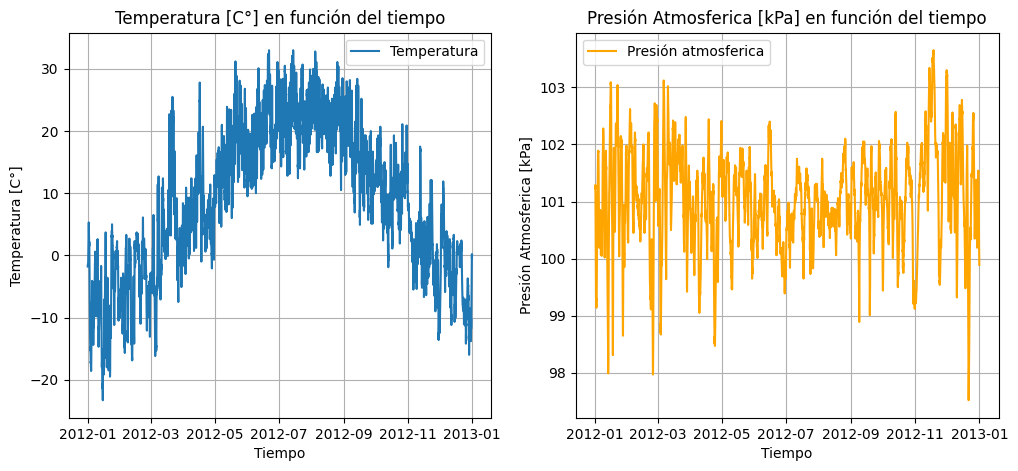

In [185]:
# E): Para el filtro anterior, realizar un gráfico de la columna "Temp_C" , "Press_kPa" como función del tiempo.

tiempo = df_wheather["Time"]=pd.to_datetime (df_wheather["Date/Time"], format='%m/%d/%Y %H:%M')
temp = df_wheather['Temp_C']
presion = df_wheather['Press_kPa']


plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title("Temperatura [C°] en función del tiempo")
plt.plot(tiempo,temp,label = "Temperatura")
plt.xlabel("Tiempo")
plt.ylabel("Temperatura [C°]")
plt.grid()
plt.legend()


plt.subplot(1,2,2)
plt.title("Presión Atmosferica [kPa] en función del tiempo")
plt.plot(tiempo,presion, label = "Presión atmosferica",color="orange")
plt.xlabel("Tiempo")
plt.ylabel("Presión Atmosferica [kPa]")
plt.legend()
plt.grid()


plt.show()